# Problem Statement :  To Predict Car Choice By Logistic Regression

# 1. Import Libraries

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss , confusion_matrix , classification_report

# 2. Data Collection

In [360]:
df = pd.read_csv('E:/ML_Datasets/sportscar_choice_long.csv')

In [361]:
df

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,1,basic,2,manual,yes,35,0
1,1,1,2,basic,5,auto,no,40,0
2,1,1,3,basic,5,auto,no,30,1
3,1,2,1,basic,5,manual,no,35,0
4,1,2,2,basic,2,manual,no,30,1
...,...,...,...,...,...,...,...,...,...
5995,200,9,2,fun,2,auto,yes,35,0
5996,200,9,3,fun,4,manual,no,30,0
5997,200,10,1,fun,4,auto,yes,40,0
5998,200,10,2,fun,4,auto,no,30,1


In [362]:
df.shape

(6000, 9)

# Check missing values

In [363]:
df.isnull().sum()

resp_id    0
ques       0
alt        0
segment    0
seat       0
trans      0
convert    0
price      0
choice     0
dtype: int64

## Check input data relation to output 

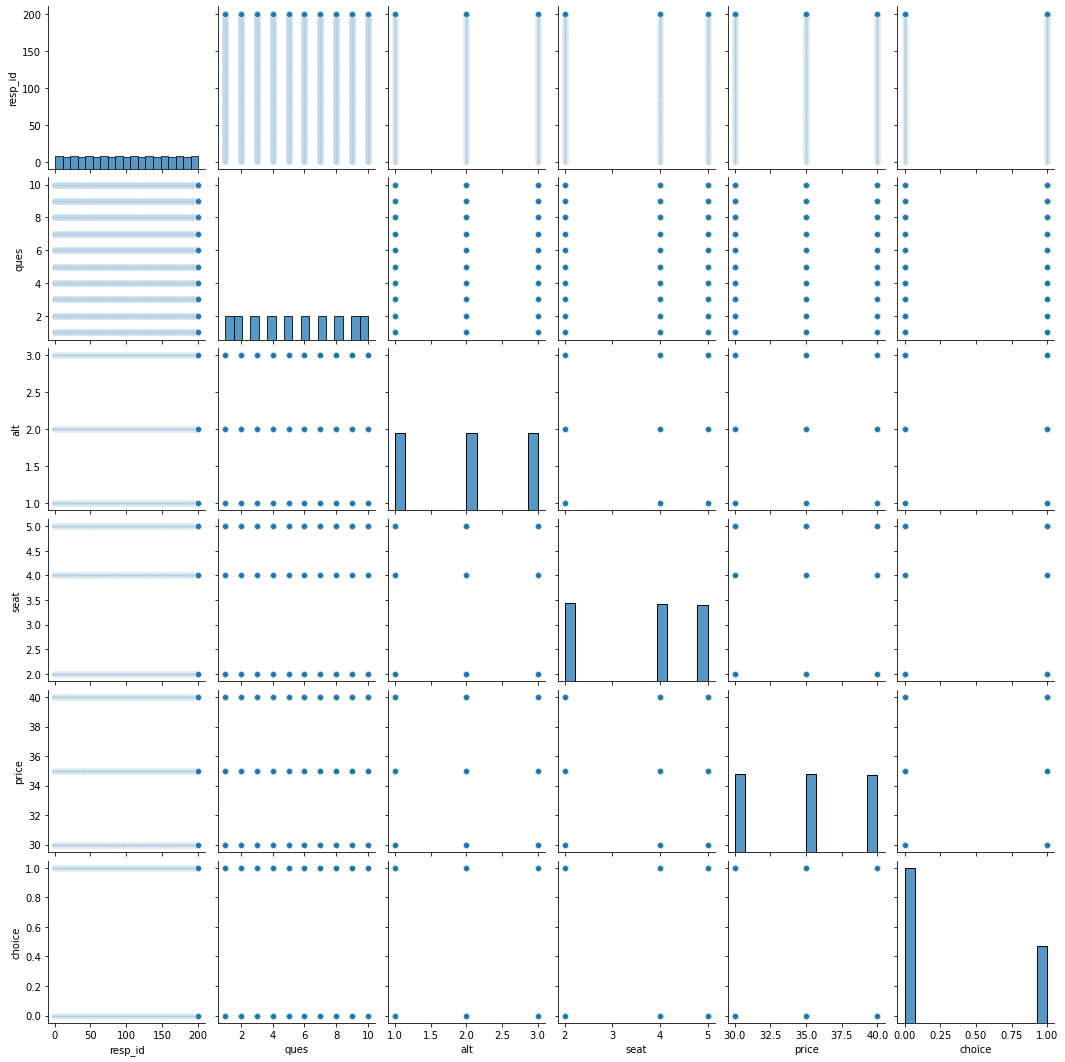

In [364]:
sns.pairplot(df)

## Histogram plot

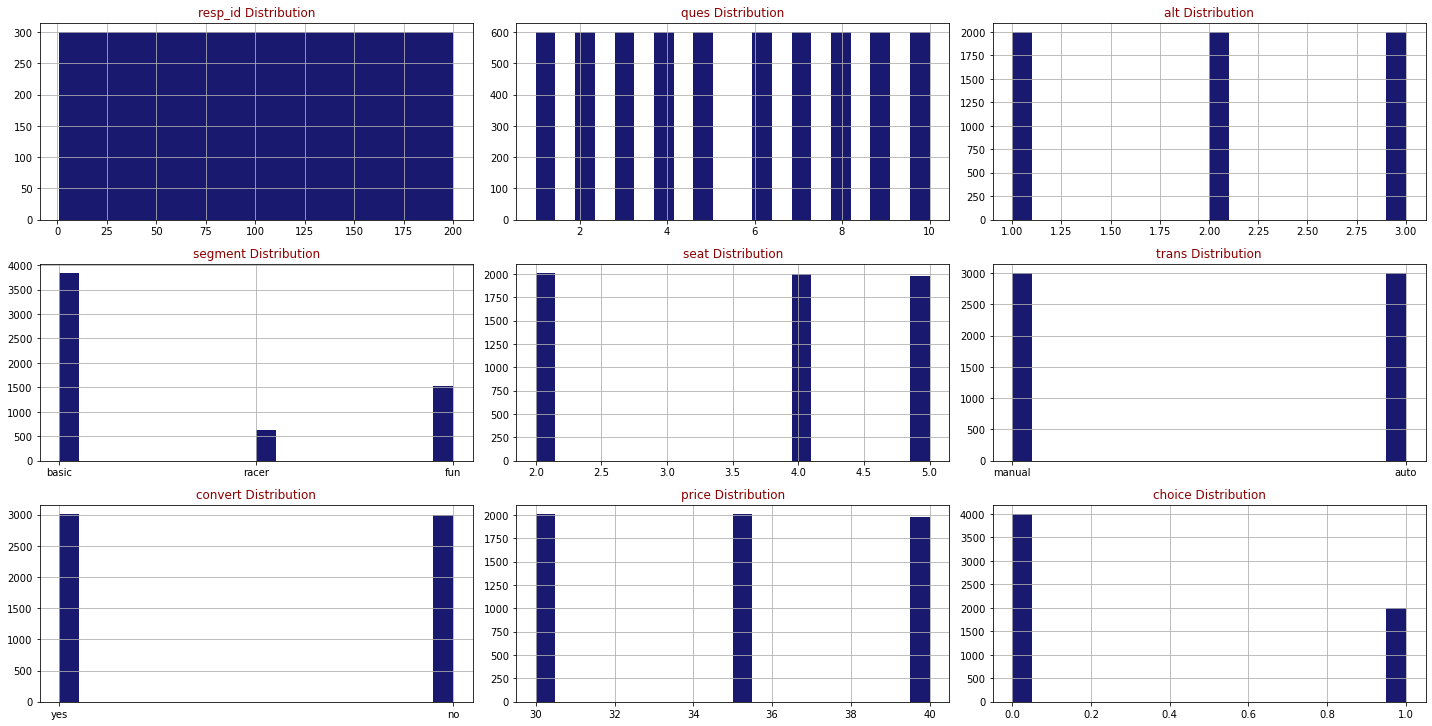

In [365]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

## Check oitliers

<AxesSubplot:>

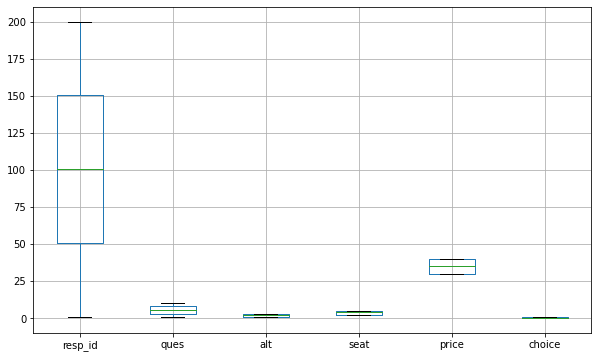

In [366]:
plt.figure(figsize = (10,6))
df.boxplot()

# check data balanced or not

In [367]:
df['choice'].value_counts()

0    4000
1    2000
Name: choice, dtype: int64

## count plot

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='choice', ylabel='count'>

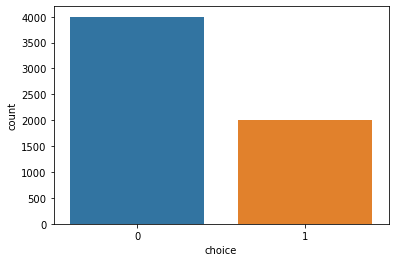

In [368]:
sns.countplot(df['choice'])

# Try to balance data

In [369]:
from sklearn.utils import resample

df_minority = df[df['choice']==1]
df_majority = df[df['choice']==0]
                 
                 
df_minority_upsample = resample(df_minority , replace = True , n_samples = 4000 , random_state = 42)
                 
                 
df_upsample = pd.concat([df_majority , df_minority_upsample])
                 
                 
                 

In [370]:
df_upsample['choice'].value_counts()

0    4000
1    4000
Name: choice, dtype: int64

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='choice', ylabel='count'>

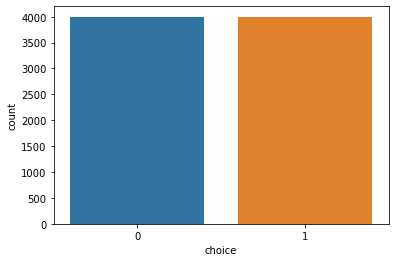

In [371]:
sns.countplot(df_upsample['choice'])

In [372]:
df.head(2)

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,1,basic,2,manual,yes,35,0
1,1,1,2,basic,5,auto,no,40,0


# LabelEncoding

In [319]:
from sklearn.preprocessing import LabelEncoder

In [320]:
label = LabelEncoder()

In [321]:
df['segment'] = label.fit_transform(df['segment'])
df['trans'] = label.fit_transform(df['trans'])
df['convert'] = label.fit_transform(df['convert'])

In [322]:
df.head(2)

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,1,0,2,1,1,35,0
1,1,1,2,0,5,0,0,40,0


# Data preprocessing for RandomForestClassifier

In [323]:
x = df.iloc[:,:-1]
y = pd.DataFrame(df.iloc[:,-1])

In [324]:
x.head(2)

,resp_id,ques,alt,segment,seat,trans,convert,price
0,1,1,1,0,2,1,1,35
1,1,1,2,0,5,0,0,40


In [325]:
y.head(2)

,choice
0,0
1,0


In [326]:
x_train  , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [327]:
from sklearn.ensemble import RandomForestClassifier

In [373]:
model = RandomForestClassifier(random_state = 42)

In [374]:
model.fit(x_train , y_train)

C:\Users\Pritam\AppData\Local\Temp/ipykernel_18088/1964293123.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train , y_train)


RandomForestClassifier(random_state=42)

## Feature importance score

In [377]:
model.feature_importances_

array([0.42381768, 0.17578871, 0.05868362, 0.08000544, 0.05277698,
       0.06623224, 0.03107587, 0.11161948])

In [378]:
Feature_score = pd.DataFrame(model.feature_importances_ , x.columns, columns = ['Feature_score'])

In [379]:
Feature_score

,Feature_score
resp_id,0.423818
ques,0.175789
alt,0.058684
segment,0.080005
seat,0.052777
trans,0.066232
convert,0.031076
price,0.111619


# countplot

<BarContainer object of 8 artists>

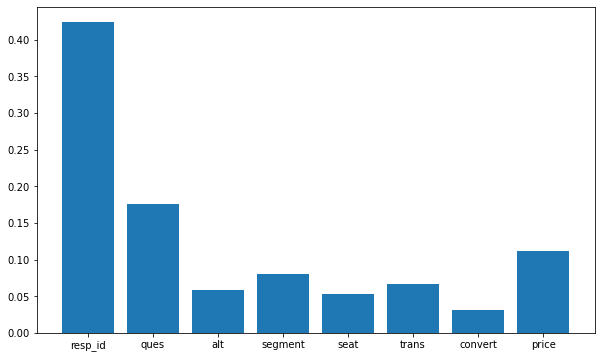

In [380]:
plt.figure(figsize = (10, 6))
plt.bar(x.columns  , model.feature_importances_)

In [381]:
x.head(2)

,resp_id,ques,alt,segment,seat,trans,convert,price
0,1,1,1,0,2,1,1,35
1,1,1,2,0,5,0,0,40


In [382]:
y.head(2)

,choice
0,0
1,0


In [383]:
x_train.head(2)

,resp_id,ques,alt,segment,seat,trans,convert,price
3897,130,10,1,0,4,1,0,35
5628,188,7,1,0,5,1,1,40


In [384]:
y_train.head(2)

,choice
3897,1
5628,0


In [385]:
x_test.head(2)

,resp_id,ques,alt,segment,seat,trans,convert,price
1782,60,5,1,2,4,0,0,40
3917,131,6,3,1,4,0,1,40


In [386]:
y.head(2)

,choice
0,0
1,0


# Building a model of Logistic Regression

In [387]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [388]:
model1

LogisticRegression()

# Fit model

In [389]:
model1.fit(x_train ,y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# prediction output

In [390]:
y_pred = pd.DataFrame(model1.predict(x_test))

In [391]:
y_pred

,0
0,0
1,0
2,1
3,0
4,1
...,...
1195,1
1196,0
1197,0
1198,0


# training accuracy

In [392]:
training_score = model1.score(x_train ,y_train)

In [393]:
training_score

0.7145833333333333

In [394]:
testing_score = model1.score(x_test , y_test)

In [395]:
testing_score

0.7108333333333333

## Here we have high bias and high variance so model is underfit

In [396]:
import sklearn
sklearn.metrics.accuracy_score(y_test , y_pred)

0.7108333333333333

# performance matrix or Evaluation matrix or cost function

In [397]:
log_loss (y_test , y_pred)

9.987516147357018

In [398]:
print(confusion_matrix(y_test , y_pred))

[[710  80]
 [267 143]]


In [399]:
cm = confusion_matrix(y_test , y_pred)

In [400]:
cm

array([[710,  80],
       [267, 143]], dtype=int64)

In [401]:
conf_matrix = pd.DataFrame(cm , columns =['predicted:1','predicted:0'],index = ['actual:1','actual:0'])

<AxesSubplot:>

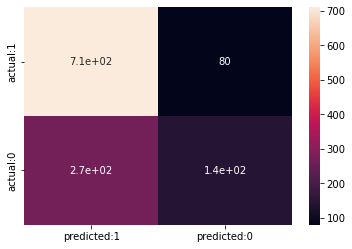

In [402]:
sns.heatmap(conf_matrix ,
    vmin=None,
    vmax=None,
    #cmap='YlGnBu',
    cmap = None,
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None)

# Here in this confusion mtrix we get 710+143 = 853  are correct predictions and 80 + 267 = 347 are wrong predictions.

# True positive = 710
# False Negative = 80
# False Positive = 267
# True Negative = 143

In [410]:
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
TN = cm[0,0]

## Accuracy

In [412]:
(TP+TN)/(TP+TN+FP+FN)

0.7108333333333333

# Missclassification

In [415]:
1-((TP+TN)/(TP+TN+FP+FN))

0.2891666666666667

In [419]:
1-(sklearn.metrics.accuracy_score(y_test , y_pred))

0.2891666666666667

## Sensitivity

In [422]:
Sensitivity = (TP)/(TP+FN)

In [424]:
Sensitivity

0.348780487804878

## Specifity

In [425]:
Specifity = (TN)/(TN+FP)

In [427]:
Specifity

0.8987341772151899

## Positive predictive value

In [420]:
(TP)/(TP+FP)

0.6412556053811659

In [ ]:
sesitivity

## Negative predictive value

In [421]:
(TN)/(TN+FN)

0.7267144319344934

## Positive Likelihood Ratio

In [431]:
(Sensitivity)/(1-Specifity)

3.444207317073171

# Negative Likelihood Ratio

In [430]:
(1-Specifity)/(Sensitivity)

0.29034256882358145

# prediction output probability score

In [433]:
y_pred_prob = model1.predict_proba(x_test)

In [439]:
y_pred_prob_df = pd.DataFrame(y_pred_prob , columns = ['prediction_probability_score:0','prediction_probability_score:1'])

In [440]:
y_pred_prob_df

,prediction_probability_score:0,prediction_probability_score:1
0,0.783866,0.216134
1,0.723858,0.276142
2,0.445937,0.554063
3,0.732058,0.267942
4,0.304506,0.695494
...,...,...
1195,0.326369,0.673631
1196,0.769564,0.230436
1197,0.754571,0.245429
1198,0.626495,0.373505


In [441]:
y_pred

,0
0,0
1,0
2,1
3,0
4,1
...,...
1195,1
1196,0
1197,0
1198,0


## Classification report

In [443]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       790
           1       0.64      0.35      0.45       410

    accuracy                           0.71      1200
   macro avg       0.68      0.62      0.63      1200
weighted avg       0.70      0.71      0.68      1200

